### Task 2

In this project, the task was to extract the Region of Interest (ROI), which is the Petri dish, from raw images in two datasets (Y2B_23 and Y2B_24). The goal was to implement a Python program using traditional computer vision (CV) methods that accurately detects and crops the Petri dish from the images.

The following requirements guided the development:

1. Dataset-Specific Handling: The Y2B_23 dataset contains a white legend on the right edge, which must be cropped, while Y2B_24 does not have this feature. The program adjusts its preprocessing accordingly.
2. Detection Criteria: The Petri dish is assumed to be a square, ignoring its corner curvature, with edges parallel to the image borders. The cropped ROI must strictly be a square.
3. Accuracy: The detected edges of the Petri dish must be within ±30 pixels of the actual Petri dish edges.
4. Generalizability: The program should work reliably on all images within both datasets.

To achieve this, the program relies on traditional CV methods such as grayscale conversion, binary thresholding, contour detection, and bounding box adjustments. The Petri dish is identified as the largest white object in the binary image. The bounding box is refined to ensure a square ROI, which is then cropped and displayed alongside the original image.

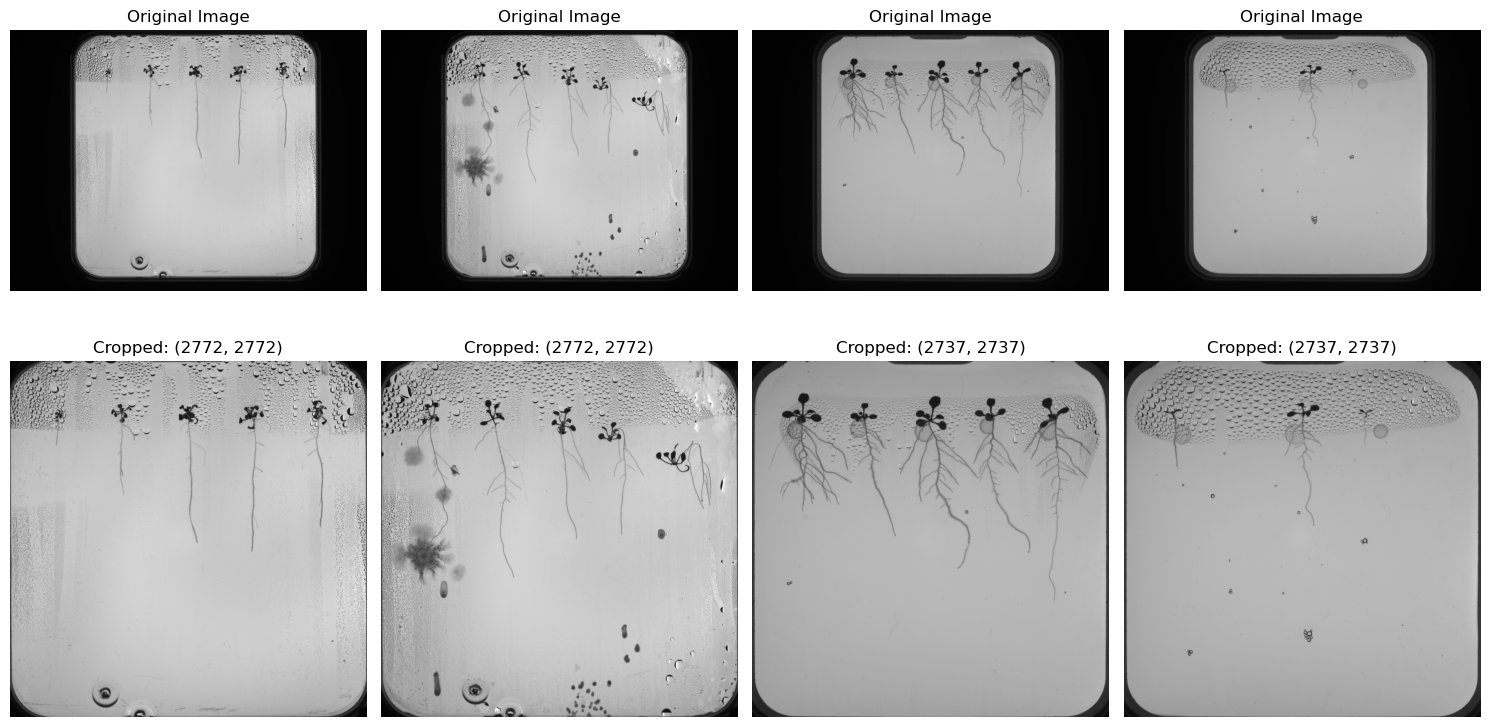

In [5]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths to datasets
dataset_paths = [
    r'C:\Users\40762\OneDrive\Desktop\Y2B_23\test\test',
    r'C:\Users\40762\OneDrive\Desktop\Y2B_24\images\images'
]

# Load exactly two random images from each dataset
def load_random_images(dataset_paths, num_images=2):
    images = []
    dataset_types = []
    for path in dataset_paths:
        files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        if len(files) >= num_images:
            selected_files = random.sample(files, num_images)
            images.extend(selected_files)
            dataset_types.extend(["Y2B_23" if "Y2B_23" in path else "Y2B_24"] * num_images)
    return images, dataset_types

# Preprocess images
def preprocess_image(image_path, dataset_type):
    image = cv2.imread(image_path)
    if dataset_type == "Y2B_23":
        # Crop the right edge to remove the white legend
        h, w, _ = image.shape
        image = image[:, :w-100]
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

# Find and crop the largest white object
def process_image(image_path, dataset_type):
    original_image, gray_image = preprocess_image(image_path, dataset_type)

    # Threshold to isolate white objects
    _, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Get the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Get bounding box of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Ensure the bounding box is a square
        if w != h:
            side_length = max(w, h)
            cx, cy = x + w // 2, y + h // 2  # Center of the bounding box
            x = max(0, cx - side_length // 2)
            y = max(0, cy - side_length // 2)
            w = h = side_length

        # Crop the image using the square bounding box
        cropped_object = original_image[y:y+h, x:x+w]
        return original_image, cropped_object, (w, h)

    print(f"No contours found in {image_path}.")
    return original_image, None, None

# Display results
def display_results(image_paths, dataset_types):
    original_images = []
    cropped_images = []
    sizes = []

    for image_path, dataset_type in zip(image_paths, dataset_types):
        original, cropped, size = process_image(image_path, dataset_type)
        if original is not None and cropped is not None:
            original_images.append(original)
            cropped_images.append(cropped)
            sizes.append(size)

    # Set up plot dimensions
    fig, axs = plt.subplots(2, len(original_images), figsize=(15, 8))

    for i in range(len(original_images)):
        # Plot original images
        axs[0, i].imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))
        axs[0, i].set_title("Original Image")
        axs[0, i].axis("off")

        # Plot cropped images
        axs[1, i].imshow(cv2.cvtColor(cropped_images[i], cv2.COLOR_BGR2RGB))
        axs[1, i].set_title(f"Cropped: {sizes[i]}")
        axs[1, i].axis("off")

    # Add space between rows
    plt.tight_layout(h_pad=2.0)
    plt.show()

# Main execution
random_images, dataset_types = load_random_images(dataset_paths, num_images=2)
display_results(random_images, dataset_types)

To solve this task, a Python program was implemented using traditional computer vision (CV) methods to detect and extract the Petri dish (ROI) from images in the Y2B_23 and Y2B_24 datasets. The program preprocesses each image by converting it to grayscale and applying binary thresholding. Contours are used to identify the largest white object, assumed to be the Petri dish. A bounding box is calculated and adjusted to ensure a square crop, which aligns with the required ±30-pixel accuracy. Dataset-specific preprocessing, such as cropping the white legend for Y2B_23, ensures the program's general applicability. The results are visualized by displaying both the original and cropped images side by side, demonstrating the program’s effectiveness on randomly selected images from each dataset.